In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [4]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [6]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


469/469 [==============================] - 2s 4ms/step - loss: 0.2651 - accuracy: 0.9249
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1061 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0701 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0507 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.9885


In [7]:
test_digits = test_images[0:10]

In [8]:
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 74ms/step


In [9]:
predictions[0]

array([2.6191989e-08, 8.7912921e-09, 5.3348367e-06, 2.4500341e-04,
       7.3796851e-11, 1.1623608e-07, 1.0989655e-11, 9.9974746e-01,
       1.8285562e-07, 1.7535690e-06], dtype=float32)

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [11]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [12]:
max([max(sequence) for sequence in train_data])

9999

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history2 = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5507 - accuracy: 0.7601 - val_loss: 0.4225 - val_accuracy: 0.8527
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3398 - accuracy: 0.8911 - val_loss: 0.3304 - val_accuracy: 0.8736
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2477 - accuracy: 0.9187 - val_loss: 0.2821 - val_accuracy: 0.8911
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2002 - accuracy: 0.9328 - val_loss: 0.2757 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1661 - accuracy: 0.9436 - val_loss: 0.2765 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1377 - accuracy: 0.9567 - val_loss: 0.2850 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1173 - accuracy: 0.9638 - val_loss: 0.3234 - val_accuracy: 0.8760
Epoch 8/20
30/30 

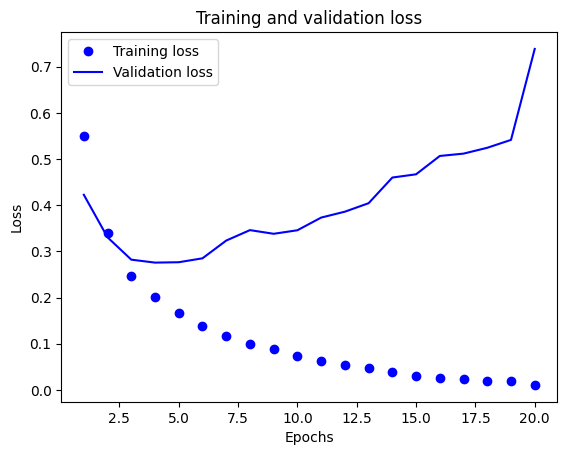

In [19]:
import matplotlib.pyplot as plt
history_dict = history2.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

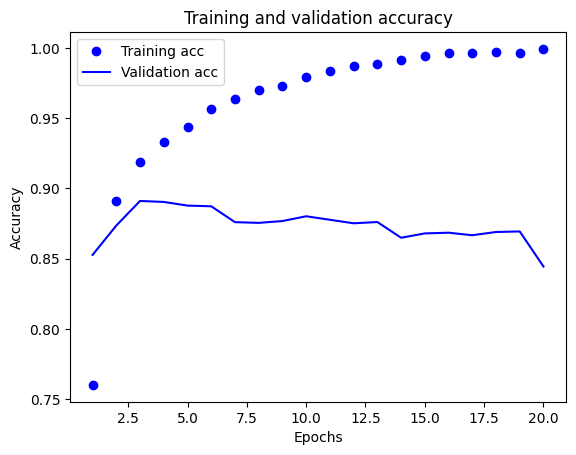

In [20]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4782 - accuracy: 0.8103
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2799 - accuracy: 0.9026
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2188 - accuracy: 0.9211
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2926 - accuracy: 0.8830


In [22]:
results

[0.29262012243270874, 0.8830400109291077]

In [23]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.22117555],
       [0.99921197],
       [0.9165294 ],
       ...,
       [0.12191914],
       [0.08764043],
       [0.68716097]], dtype=float32)

In [24]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history1 = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5143 - accuracy: 0.7956 - val_loss: 0.4133 - val_accuracy: 0.8617
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3473 - accuracy: 0.8907 - val_loss: 0.3758 - val_accuracy: 0.8475
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2782 - accuracy: 0.9120 - val_loss: 0.3061 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2347 - accuracy: 0.9249 - val_loss: 0.2963 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2040 - accuracy: 0.9359 - val_loss: 0.2920 - val_accuracy: 0.8819
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1826 - accuracy: 0.9432 - val_loss: 0.2779 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1643 - accuracy: 0.9491 - val_loss: 0.2751 - val_accuracy: 0.8873
Epoch 8/20
30/30 

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history3 = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5367 - accuracy: 0.7805 - val_loss: 0.4103 - val_accuracy: 0.8511
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3214 - accuracy: 0.8954 - val_loss: 0.3250 - val_accuracy: 0.8777
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2341 - accuracy: 0.9239 - val_loss: 0.3117 - val_accuracy: 0.8741
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1846 - accuracy: 0.9389 - val_loss: 0.3120 - val_accuracy: 0.8765
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1530 - accuracy: 0.9505 - val_loss: 0.2850 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1249 - accuracy: 0.9621 - val_loss: 0.2974 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1084 - accuracy: 0.9668 - val_loss: 0.3143 - val_accuracy: 0.8800
Epoch 8/20
30/

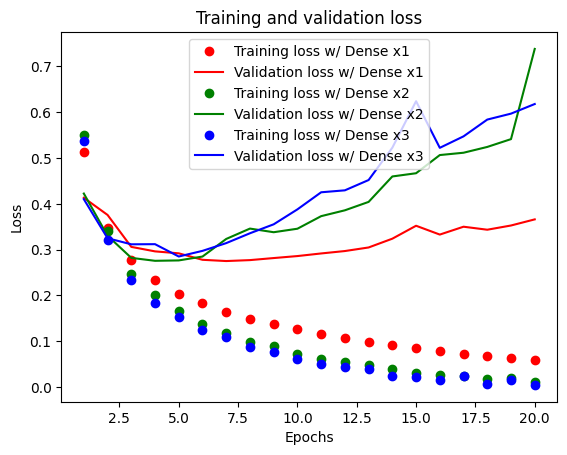

In [26]:
import matplotlib.pyplot as plt
color = ("r", "g", "b")
comment = ("Dense x1", "Dense x2", "Dense x3")
for index, history in enumerate((history1, history2, history3)):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, color[index]+"o", label="Training loss w/ " + comment[index])
    plt.plot(epochs, val_loss_values, color[index], label="Validation loss w/ " + comment[index])
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

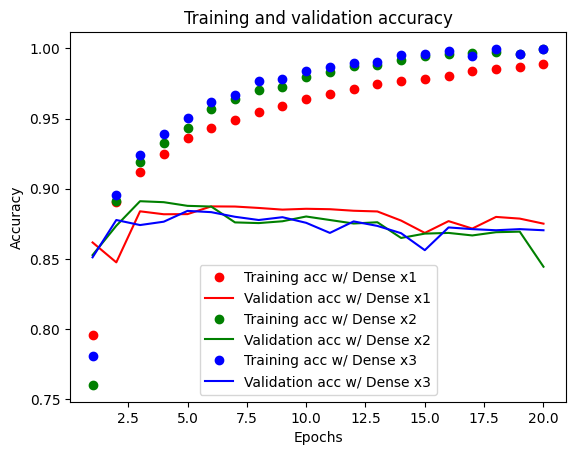

In [27]:
plt.clf()
color = ("r", "g", "b")
for index, history in enumerate((history1, history2, history3)):
    history_dict = history.history
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    plt.plot(epochs, acc, color[index]+"o", label="Training acc w/ " + comment[index])
    plt.plot(epochs, val_acc, color[index], label="Validation acc w/ " + comment[index])
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history_unit8 = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5754 - accuracy: 0.7538 - val_loss: 0.4612 - val_accuracy: 0.8423
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3842 - accuracy: 0.8846 - val_loss: 0.3557 - val_accuracy: 0.8793
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2932 - accuracy: 0.9086 - val_loss: 0.3094 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2375 - accuracy: 0.9249 - val_loss: 0.2858 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2015 - accuracy: 0.9361 - val_loss: 0.2783 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1726 - accuracy: 0.9460 - val_loss: 0.2736 - val_accuracy: 0.8895
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1499 - accuracy: 0.9535 - val_loss: 0.2803 - val_accuracy: 0.8861
Epoch 8/20
30/30 [

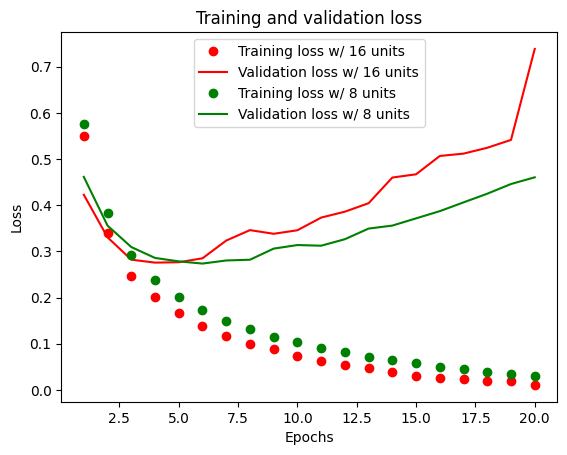

In [29]:
import matplotlib.pyplot as plt
color = ("r", "g", "b")
comment = ("16 units", "8 units") 
for index, history in enumerate((history2, history_unit8)):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, color[index]+"o", label="Training loss w/ " + comment[index])
    plt.plot(epochs, val_loss_values, color[index], label="Validation loss w/ " + comment[index])
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [30]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
    loss="mse",
    metrics=["accuracy"])
history5 = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1905 - accuracy: 0.7553 - val_loss: 0.1438 - val_accuracy: 0.8415
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1144 - accuracy: 0.8817 - val_loss: 0.1059 - val_accuracy: 0.8786
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0859 - accuracy: 0.9045 - val_loss: 0.0927 - val_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0694 - accuracy: 0.9219 - val_loss: 0.0868 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0587 - accuracy: 0.9351 - val_loss: 0.0843 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0516 - accuracy: 0.9441 - val_loss: 0.0888 - val_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0456 - accuracy: 0.9522 - val_loss: 0.0909 - val_accuracy: 0.8777
Epoch 8/20
30/30

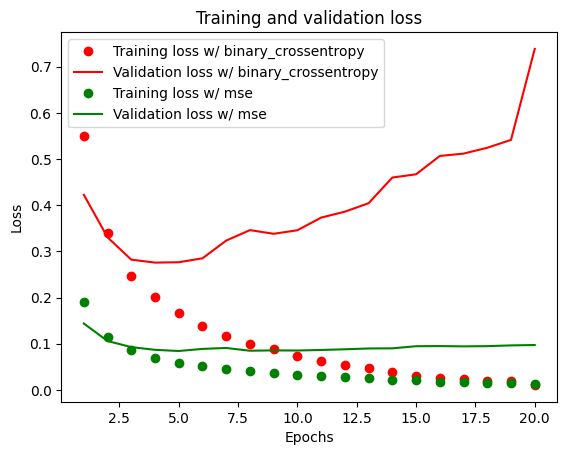

In [31]:
import matplotlib.pyplot as plt
color = ("r", "g", "b")
comment = ("binary_crossentropy", "mse") 
for index, history in enumerate((history2, history5)):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, color[index]+"o", label="Training loss w/ " + comment[index])
    plt.plot(epochs, val_loss_values, color[index], label="Validation loss w/ " + comment[index])
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

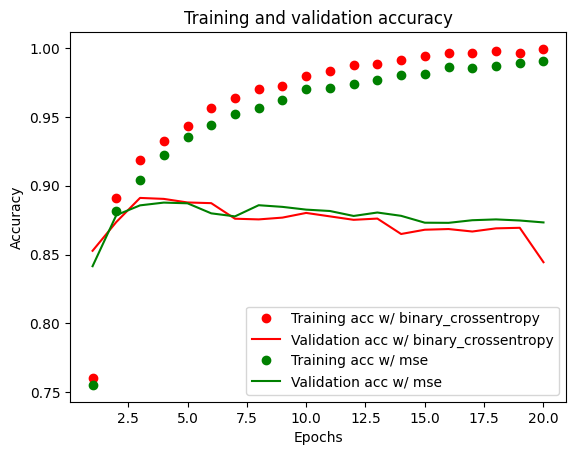

In [32]:
plt.clf()
color = ("r", "g", "b")
comment = ("binary_crossentropy", "mse") 
for index, history in enumerate((history2, history5)):
    history_dict = history.history
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    plt.plot(epochs, acc, color[index]+"o", label="Training acc w/ " + comment[index])
    plt.plot(epochs, val_acc, color[index], label="Validation acc w/ " + comment[index])
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"])
history6 = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4910 - accuracy: 0.7924 - val_loss: 0.3667 - val_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2868 - accuracy: 0.9017 - val_loss: 0.3095 - val_accuracy: 0.8724
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2097 - accuracy: 0.9242 - val_loss: 0.2756 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1646 - accuracy: 0.9408 - val_loss: 0.2787 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1297 - accuracy: 0.9549 - val_loss: 0.3208 - val_accuracy: 0.8743
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1057 - accuracy: 0.9645 - val_loss: 0.3284 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0898 - accuracy: 0.9688 - val_loss: 0.3763 - val_accuracy: 0.8777
Epoch 8/20
30/30 

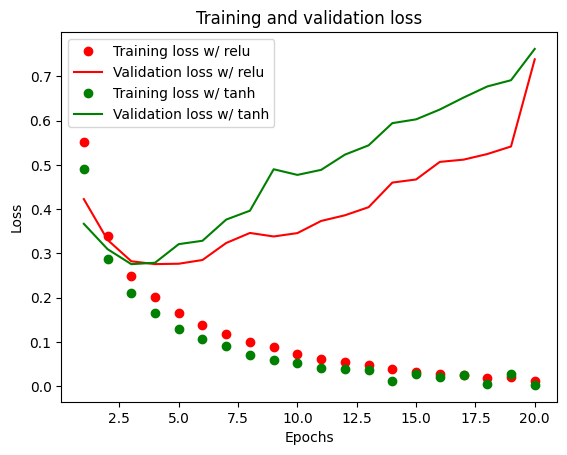

In [34]:
import matplotlib.pyplot as plt
color = ("r", "g", "b")
comment = ("relu", "tanh") 
for index, history in enumerate((history2, history6)):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, color[index]+"o", label="Training loss w/ " + comment[index])
    plt.plot(epochs, val_loss_values, color[index], label="Validation loss w/ " + comment[index])
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()